In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
tpm = pd.read_table('GSE48968_allgenesTPM_GSM1189042_GSM1190902.txt');

In [4]:
tpm.columns

Index(['On_Chip_Stimulation_LPS_4h_S10', 'On_Chip_Stimulation_LPS_4h_S11',
       'On_Chip_Stimulation_LPS_4h_S12', 'On_Chip_Stimulation_LPS_4h_S13',
       'On_Chip_Stimulation_LPS_4h_S15', 'On_Chip_Stimulation_LPS_4h_S16',
       'On_Chip_Stimulation_LPS_4h_S17', 'On_Chip_Stimulation_LPS_4h_S18',
       'On_Chip_Stimulation_LPS_4h_S19', 'On_Chip_Stimulation_LPS_4h_S1',
       ...
       'Tube_Control_LPS_4h', 'Tube_Control_LPS_6h', 'Tube_Control_PAM_1h',
       'Tube_Control_PAM_2h', 'Tube_Control_PAM_4h', 'Tube_Control_PAM_6h',
       'Tube_Control_PIC_1h', 'Tube_Control_PIC_2h', 'Tube_Control_PIC_4h',
       'Tube_Control_PIC_6h'],
      dtype='object', length=1861)

In [709]:
sample_info=pd.DataFrame({'treatment': tpm.columns.str.split('_').str.get(0)}, index=tpm.columns)
sample_info.head()

,treatment
On_Chip_Stimulation_LPS_4h_S10,On
On_Chip_Stimulation_LPS_4h_S11,On
On_Chip_Stimulation_LPS_4h_S12,On
On_Chip_Stimulation_LPS_4h_S13,On
On_Chip_Stimulation_LPS_4h_S15,On


In [711]:
sample_info.treatment.value_counts()

LPS             479
PIC             366
PAM             341
Unstimulated    192
Ifnar1           96
Tnfr             96
Stat1            94
IFNB             94
On               90
Tube             13
Name: treatment, dtype: int64

In [712]:
sample_info['is_replicate'] = sample_info.index.str.contains('eplicate')

In [713]:
sample_info.query('~is_replicate').treatment.value_counts()

LPS             383
PIC             366
PAM             341
Unstimulated     96
Ifnar1           96
Tnfr             96
Stat1            94
IFNB             94
On               90
Tube             13
Name: treatment, dtype: int64

In [714]:
sample_info.query('~is_replicate').query('treatment == "LPS"').head()

,treatment,is_replicate
LPS_1h_S10,LPS,False
LPS_1h_S11,LPS,False
LPS_1h_S12,LPS,False
LPS_1h_S13,LPS,False
LPS_1h_S14,LPS,False


In [715]:
qc_data = pd.read_excel('nature13437-s3.xls')

In [716]:
qc_data.index = qc_data.Experiment.str.replace('_rsem', '')

In [717]:
qc_data = qc_data.drop(['Averages', 'Standard Deviation'], 0)

In [718]:
qc_data.shape

(1788, 3)

In [719]:
sample_info.shape

(1861, 2)

In [720]:
sample_info = sample_info.join(qc_data).dropna()

In [721]:
sample_info.shape

(1224, 5)

In [723]:
sample_info.query('~is_replicate').treatment.value_counts()

LPS             300
PAM             224
PIC             221
Unstimulated     87
IFNB             66
Ifnar1           54
Tnfr             49
On               41
Stat1            38
Tube             13
Name: treatment, dtype: int64

In [725]:
sample_info['SERPINB6B'] = tpm.T.SERPINB6B
sample_info['LYZ1'] = tpm.T.LYZ1

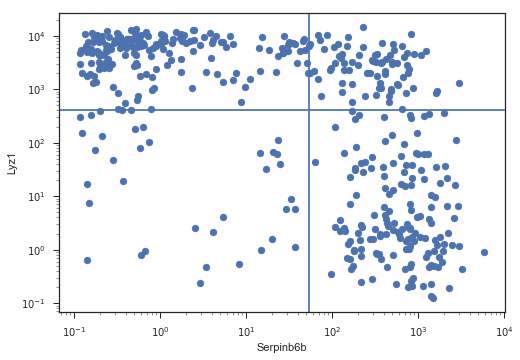

In [729]:
plt.loglog();
plt.scatter(sample_info.SERPINB6B, sample_info.LYZ1);
plt.axvline(np.expm1(4))
plt.axhline(np.expm1(6))
plt.xlabel('Serpinb6b')
plt.ylabel('Lyz1');

In [731]:
sample_info = sample_info.query('SERPINB6B < {} & LYZ1 > {}'.format(np.expm1(4), np.expm1(6)))

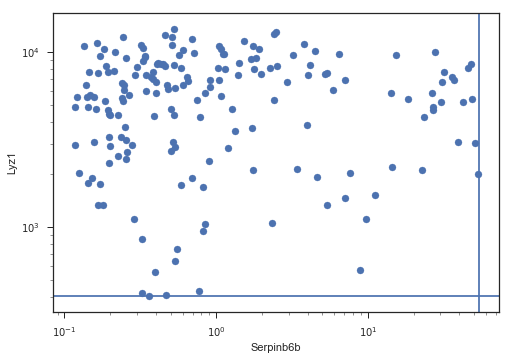

In [732]:
plt.loglog();
plt.scatter(sample_info.SERPINB6B, sample_info.LYZ1);
plt.axvline(np.expm1(4))
plt.axhline(np.expm1(6))
plt.xlabel('Serpinb6b')
plt.ylabel('Lyz1');

In [733]:
sample_info.shape

(853, 7)

In [736]:
sample_info.head()

,treatment,is_replicate,Experiment,Total Reads,Aligned Reads % (Transcriptome),SERPINB6B,LYZ1
On_Chip_Stimulation_LPS_4h_S10,On,False,On_Chip_Stimulation_LPS_4h_S10_rsem,1528837.0,31.59,0.0,1474.178438
On_Chip_Stimulation_LPS_4h_S11,On,False,On_Chip_Stimulation_LPS_4h_S11_rsem,1519096.0,36.06,0.0,2847.000229
On_Chip_Stimulation_LPS_4h_S13,On,False,On_Chip_Stimulation_LPS_4h_S13_rsem,2866167.0,43.32,0.0,2886.281230
On_Chip_Stimulation_LPS_4h_S16,On,False,On_Chip_Stimulation_LPS_4h_S16_rsem,2096589.0,33.16,0.0,1782.281468
On_Chip_Stimulation_LPS_4h_S17,On,False,On_Chip_Stimulation_LPS_4h_S17_rsem,1427777.0,25.52,0.0,1907.395847


In [737]:
tpm = tpm[sample_info.index]

In [738]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import MDS, Isomap
from sklearn.preprocessing import scale
import NaiveDE

In [739]:
pca = PCA(n_components=2)
# pca = FastICA(n_components=2)
# pca = Isomap(n_components=2, n_neighbors=200)

In [741]:
relevant = sample_info.query('~is_replicate & treatment in ["LPS", "PIC", "PAM"]').copy()
relevant = relevant.rename(columns={'Total Reads': 'total_reads', 'Aligned Reads % (Transcriptome)': 'aligned_reads'})

In [744]:
relevant['timepoint'] = relevant.Experiment.str.split('_').str.get(1)

idx = relevant.query('treatment == "Unstimulated"').index
relevant.loc[idx, 'timepoint'] = '0h'

In [748]:
relevant['timepoint'].value_counts()

1h    179
2h    150
4h    115
6h    109
Name: timepoint, dtype: int64

In [749]:
logexp = np.log10(tpm[relevant.index] + 1)
relevant['n_genes'] = (logexp > 0.3).sum(0)

In [752]:
logexp.shape

(27723, 553)

In [753]:
relevant.shape

(553, 9)

In [754]:
import seaborn as sns
sns.set_style('ticks')

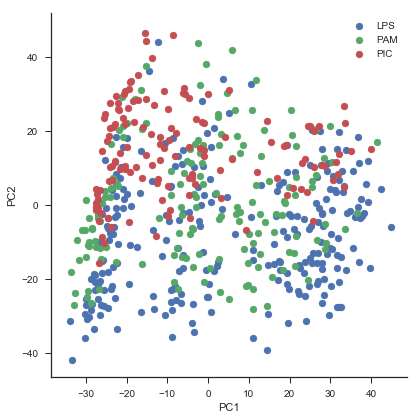

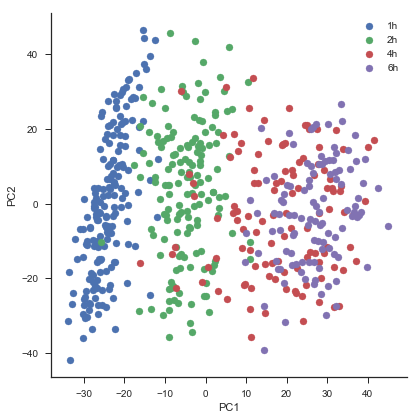

In [756]:
Y = pca.fit_transform(scale(logexp.T, 1))

tmp = relevant.copy()
tmp['PC1'] = Y[:, 0]
tmp['PC2'] = Y[:, 1]

g = sns.FacetGrid(tmp, hue='treatment', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

g = sns.FacetGrid(tmp, hue='timepoint', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

In [626]:
import patsy

In [757]:
patsy.dmatrix(' + '.join(tmp.drop('Experiment', 1).columns) + ' - 1', tmp, return_type='dataframe') \
    .corrwith(tmp.PC1) \
    .sort_values(ascending=False) \
    .head(10)

PC1                1.000000e+00
timepoint[T.6h]    6.191466e-01
timepoint[T.4h]    4.335288e-01
treatment[LPS]     1.942599e-01
aligned_reads      1.227437e-01
PC2               -1.140916e-16
SERPINB6B         -4.298641e-02
treatment[PAM]    -5.119421e-02
total_reads       -1.108805e-01
timepoint[T.2h]   -1.342060e-01
dtype: float64

In [760]:
patsy.dmatrix(' + '.join(tmp.drop('Experiment', 1).columns) + ' - 1', tmp, return_type='dataframe') \
    .corrwith(tmp.PC2) \
    .sort_values(ascending=False) \
    .head(10)

PC2                1.000000e+00
treatment[PIC]     4.723990e-01
LYZ1               3.563051e-01
timepoint[T.2h]    1.300996e-01
SERPINB6B          2.189731e-02
treatment[PAM]     1.857939e-02
PC1               -1.140916e-16
timepoint[T.6h]   -7.252623e-02
timepoint[T.4h]   -7.775261e-02
total_reads       -2.590513e-01
dtype: float64

In [761]:
logexp.index[pca.components_[0, :].argsort()[::-1]]

Index(['CCL5', 'RSAD2', 'IFIT1', 'CXCL10', 'IFIT2', 'CD40', 'IFI205', 'MX1',
       'CMPK2', 'USP18',
       ...
       'IFNGR1', 'KLF4', 'FOS', 'CCR2', 'RGS2', 'SVIL', 'TMEM154', 'TMEM37',
       'ZFP36L2', 'DHRS3'],
      dtype='object', length=27723)

In [762]:
logexp.index[pca.components_[1, :].argsort()[::-1]]

Index(['4930412F15RIK', 'COX2', 'GU332589', 'AK140265', 'AK141672', 'TPT1',
       'ATPASE6', 'DQ539915', 'AK217941', 'LYZ1',
       ...
       'MRPL28', 'MGL2', 'NDUFS7', 'STMN1', 'TIMM17A', 'POLDIP3', 'AY096003',
       'RAB7', 'SEC11A', 'CCL17'],
      dtype='object', length=27723)

2120.26411236


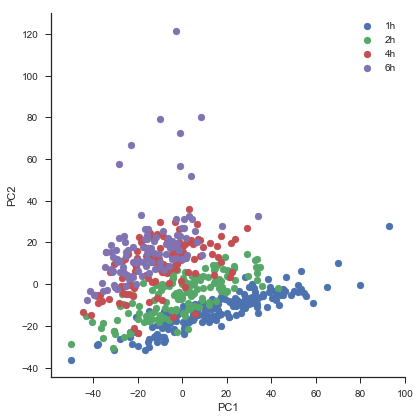

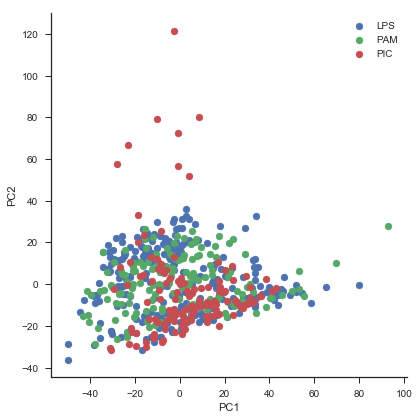

In [766]:
res = NaiveDE.regress_out(relevant, logexp, 'treatment', 'timepoint + 1', rcond=1e-4)
print(np.linalg.norm(res))

Y = pca.fit_transform(scale(res.T, 0))
# print(pca.explained_variance_ratio_)

tmp = relevant.copy()
tmp['PC1'] = Y[:, 0]
tmp['PC2'] = Y[:, 1]

g = sns.FacetGrid(tmp, hue='timepoint', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

g = sns.FacetGrid(tmp, hue='treatment', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

In [767]:
patsy.dmatrix(' + '.join(tmp.drop('Experiment', 1).columns) + ' - 1', tmp, return_type='dataframe') \
    .corrwith(tmp.PC1) \
    .sort_values(ascending=False) \
    .head(10)

PC1                1.000000e+00
n_genes            8.630935e-01
total_reads        1.462105e-01
treatment[PIC]     8.197100e-02
SERPINB6B          5.060287e-02
LYZ1               2.608122e-02
aligned_reads      1.924141e-02
PC2                2.186415e-17
timepoint[T.2h]   -5.827432e-03
treatment[PAM]    -2.322222e-02
dtype: float64

In [768]:
patsy.dmatrix(' + '.join(tmp.drop('Experiment', 1).columns) + ' - 1', tmp, return_type='dataframe') \
    .corrwith(tmp.PC2) \
    .sort_values(ascending=False) \
    .head(10)

PC2                1.000000e+00
timepoint[T.6h]    5.299607e-01
n_genes            2.771140e-01
timepoint[T.4h]    2.593952e-01
treatment[LPS]     6.719420e-02
treatment[PAM]     3.216847e-02
SERPINB6B          1.231442e-02
PC1                2.186415e-17
total_reads       -3.608148e-02
aligned_reads     -5.339626e-02
dtype: float64

2185.46414027


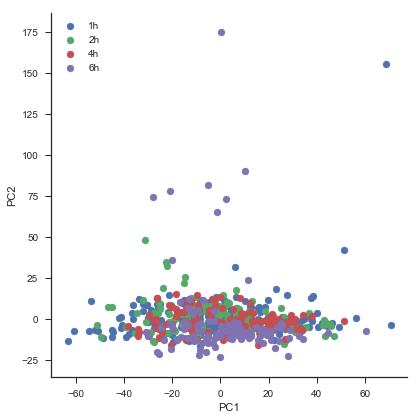

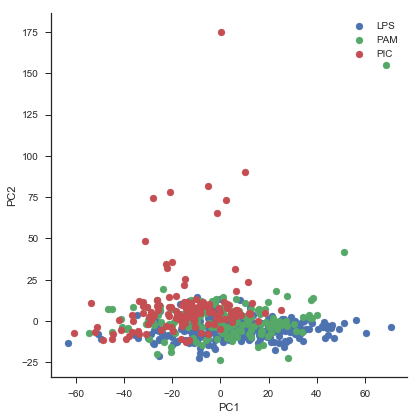

In [769]:
res = NaiveDE.regress_out(relevant, logexp, 'timepoint', 'treatment + 1', rcond=1e-4)
print(np.linalg.norm(res))

Y = pca.fit_transform(scale(res.T, 0))
# print(pca.explained_variance_ratio_)

tmp = relevant.copy()
tmp['PC1'] = Y[:, 0]
tmp['PC2'] = Y[:, 1]

g = sns.FacetGrid(tmp, hue='timepoint', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

g = sns.FacetGrid(tmp, hue='treatment', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

2232.00101478


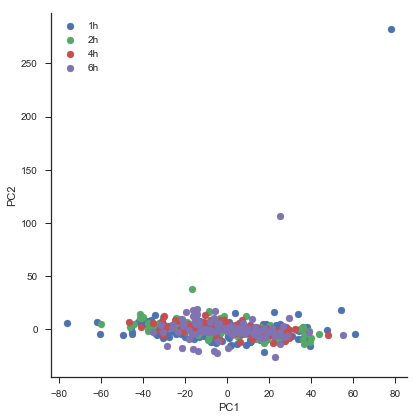

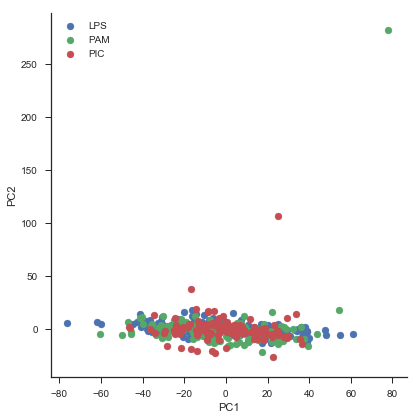

In [771]:
res = NaiveDE.regress_out(relevant, logexp, 'timepoint * treatment', '1', rcond=1e-4)
print(np.linalg.norm(res))

Y = pca.fit_transform(scale(res.T, 0))
# print(pca.explained_variance_ratio_)

tmp = relevant.copy()
tmp['PC1'] = Y[:, 0]
tmp['PC2'] = Y[:, 1]

g = sns.FacetGrid(tmp, hue='timepoint', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

g = sns.FacetGrid(tmp, hue='treatment', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

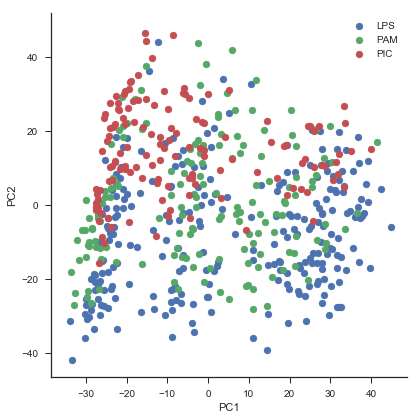

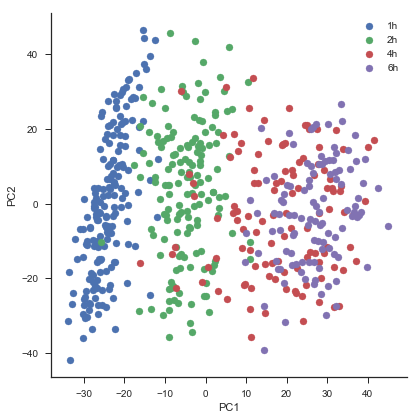

In [772]:
Y = pca.fit_transform(scale(logexp.T, 1))

tmp = relevant.copy()
tmp['PC1'] = Y[:, 0]
tmp['PC2'] = Y[:, 1]

g = sns.FacetGrid(tmp, hue='treatment', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

g = sns.FacetGrid(tmp, hue='timepoint', size=6)
g.map(plt.scatter, 'PC1', 'PC2')
plt.legend();

In [773]:
pca.explained_variance_ratio_

array([ 0.04015097,  0.02723413])

In [774]:
import GPy

In [829]:
m = GPy.models.BayesianGPLVM(Y=scale(logexp.T, 1), input_dim=1, init='random')

In [830]:
for i in range(relevant.shape[0]):
    h = float(relevant.iloc[i].timepoint[0])
    m.X.mean[[i], 0].set_prior(GPy.priors.Gaussian(h, 1.0))

In [831]:
m.optimize(messages=True)

In [832]:
# m.plot_latent(labels=relevant.timepoint)

In [833]:
# m.kern.plot_ARD()

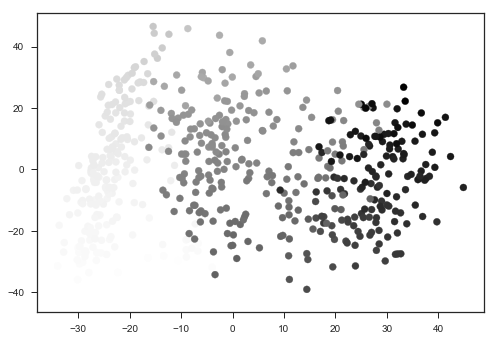

In [834]:
plt.scatter(Y[:, 0], Y[:, 1], c=m.X.mean[:, 0]);

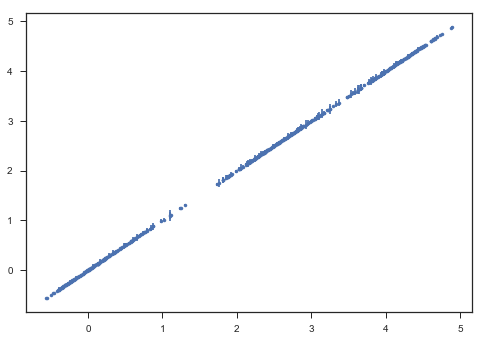

In [843]:
plt.errorbar(m.X.mean[:, 0], m.X.mean[:, 0], yerr=2*np.sqrt(m.X.variance[:, 0]), fmt='.');

In [845]:
relevant['PC1'] = tmp['PC1']
relevant['PC2'] = tmp['PC2']
relevant['pseudotime'] = m.X.mean[:, 0]

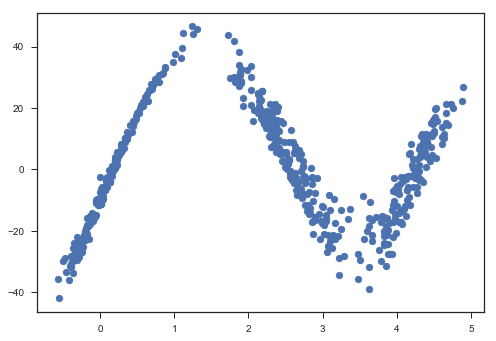

In [849]:
plt.scatter(relevant.pseudotime, relevant.PC2)

In [852]:
relevant['hour'] = relevant.timepoint.str.get(0).map(float)

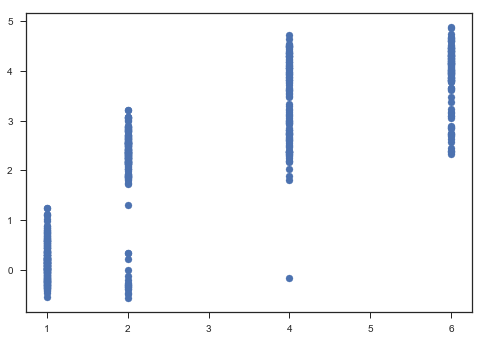

In [854]:
plt.scatter(relevant.hour, relevant.pseudotime);

In [859]:
relevant.to_csv('timecourse_samples.csv')

In [860]:
logexp.to_csv('timecourse_logtpm.csv')

In [861]:
ls -lha

total 708160
drwxr-xr-x  10 vale  staff   340B  7 Feb 17:58 ./
drwxr-xr-x   7 vale  staff   238B  7 Feb 11:20 ../
drwxr-xr-x   3 vale  staff   102B  7 Feb 17:15 .ipynb_checkpoints/
-rw-r--r--   1 vale  staff   622K  7 Feb 17:58 Antiviral analysis.ipynb
-rw-r--r--@  1 vale  staff   205M  7 Feb 10:47 GSE48968_allgenesTPM_GSM1189042_GSM1190902.txt
-rw-r--r--@  1 vale  staff    41M  7 Feb 10:46 GSE48968_allgenesTPM_GSM1406531_GSM1407094.txt
-rw-r--r--@  1 vale  staff    35K  7 Feb 11:23 nature13437-s2.xls
-rw-r--r--@  1 vale  staff   151K  7 Feb 11:23 nature13437-s3.xls
-rw-r--r--   1 vale  staff    99M  7 Feb 17:58 timecourse_logtpm.csv
-rw-r--r--   1 vale  staff    79K  7 Feb 17:58 timecourse_samples.csv
